<a href="https://colab.research.google.com/github/sudha161/Detecting-the-level-of-Varicose-Ulcer-using-CNN/blob/master/detecting_level_of_varicose_ulcer_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import pandas as pd

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from sklearn.naive_bayes import GaussianNB
from PIL import Image

import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from scipy import misc
import matplotlib.gridspec as gridspec
import pydot
import graphviz
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
%matplotlib inline





In [0]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory):
        if labels == 'venous': #Folder contain venous Images get the '1' class label.
            label = 1
        elif labels == 'diabetics': #Folder contain diabetics Images get the '2' class label.
            label = 2
        
        for image_file in os.listdir(directory+labels):
            image = cv2.imread(directory+'/'+labels+'/'+image_file)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            image=cv2.fastNlMeansDenoisingColored(image,0,20,20,7,15)
            #image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {1:'venous', 2:'diabetics'}
    
    return labels[class_code]

In [0]:
img_dir = "/home/diseaseulcer/"# Enter Directory of all images

Images, Labels = get_images(img_dir) #Extract the training images from the folders.
Images= np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)
print(Images.shape)


(118, 150, 150, 3)


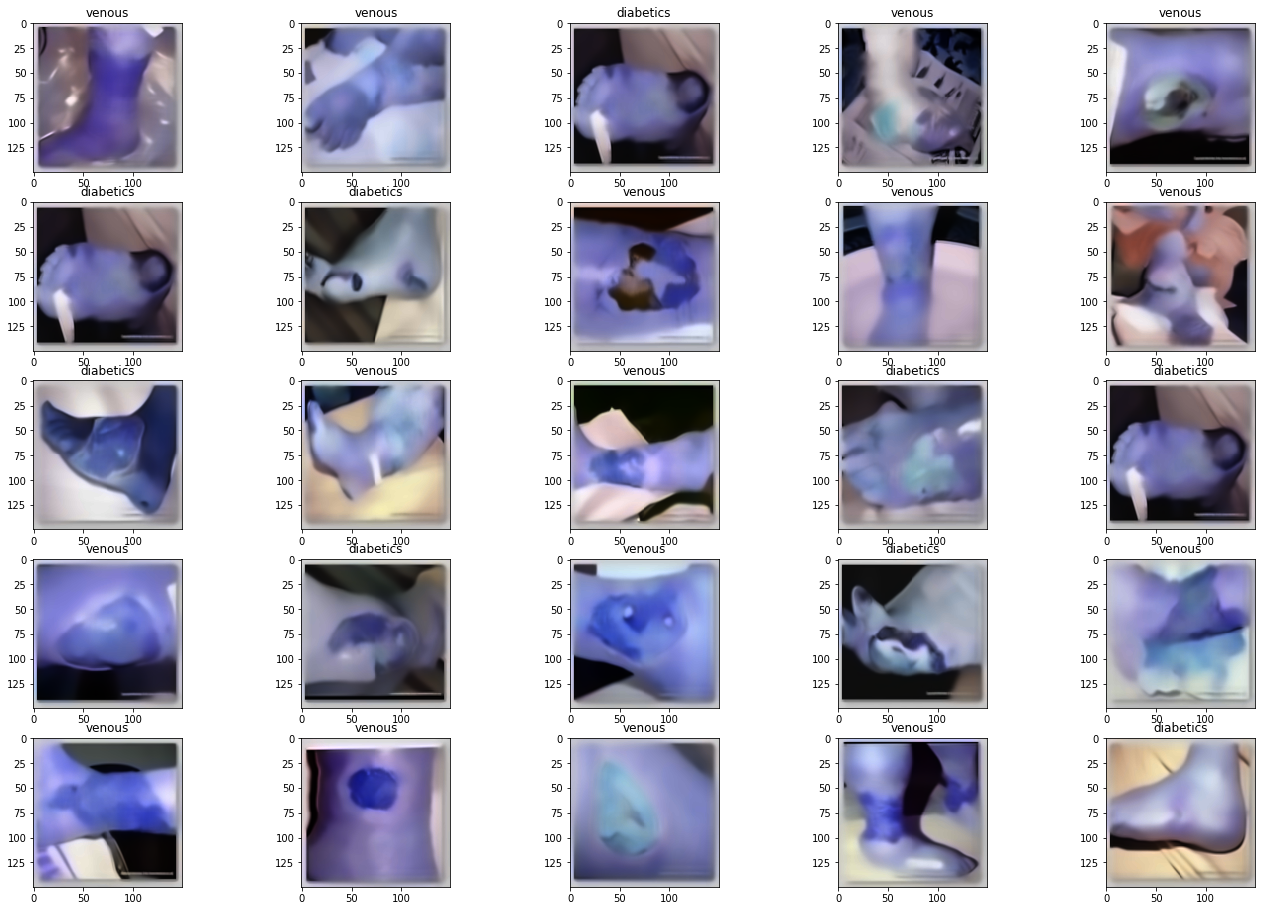

In [0]:

f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('on')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________

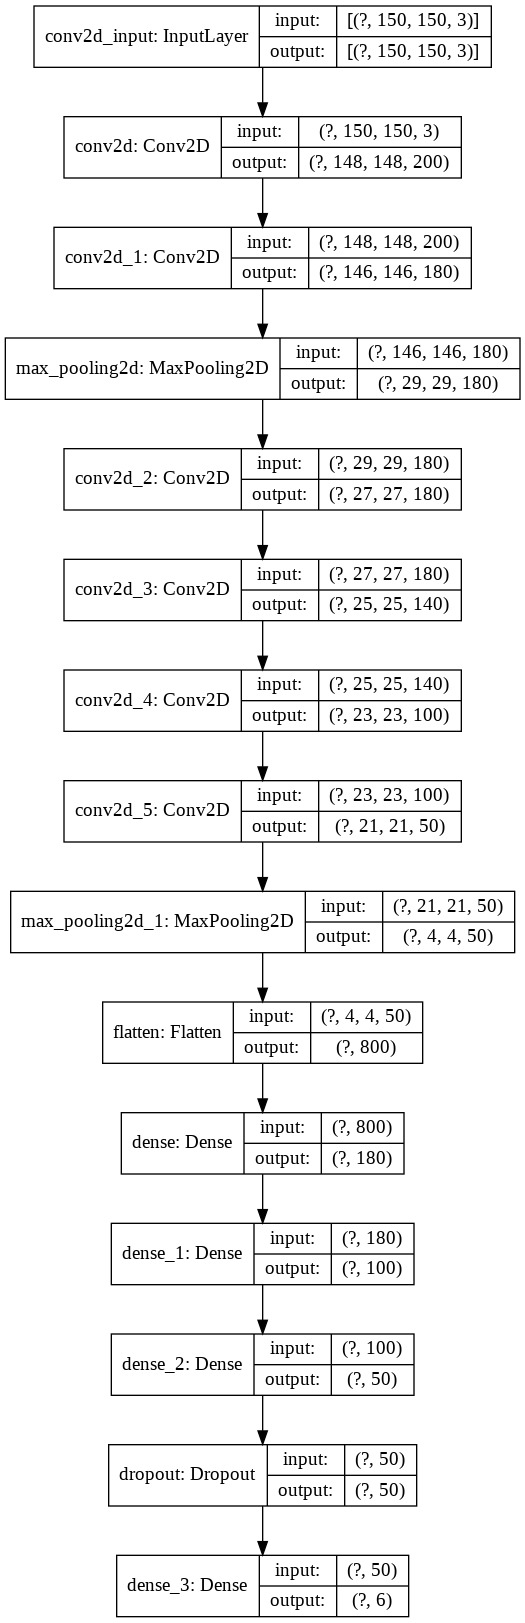

In [0]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [0]:
trained = model.fit(Images,Labels,epochs=33,validation_split=0.30)


Train on 82 samples, validate on 36 samples
Epoch 1/33
82/82 [==============================] - 82s 1s/sample - loss: 0.6220 - acc: 0.7683 - val_loss: 0.7859 - val_acc: 0.6111
Epoch 2/33
82/82 [==============================] - 82s 1s/sample - loss: 0.6034 - acc: 0.7317 - val_loss: 0.8201 - val_acc: 0.6111
Epoch 3/33
82/82 [==============================] - 82s 1s/sample - loss: 0.6479 - acc: 0.7195 - val_loss: 0.6782 - val_acc: 0.6389
Epoch 4/33
82/82 [==============================] - 82s 1s/sample - loss: 0.6216 - acc: 0.7683 - val_loss: 0.6920 - val_acc: 0.5833
Epoch 5/33
82/82 [==============================] - 82s 1s/sample - loss: 0.5927 - acc: 0.7195 - val_loss: 0.6972 - val_acc: 0.6944
Epoch 6/33
82/82 [==============================] - 82s 1s/sample - loss: 0.5161 - acc: 0.8049 - val_loss: 0.7376 - val_acc: 0.6111
Epoch 7/33
82/82 [==============================] - 82s 1s/sample - loss: 0.4667 - acc: 0.8049 - val_loss: 0.7436 - val_acc: 0.6389
Epoch 8/33
82/82 [==============

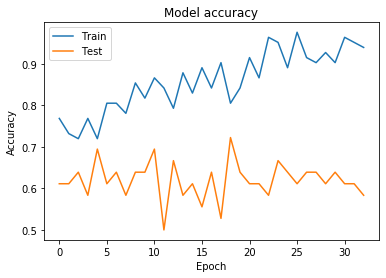

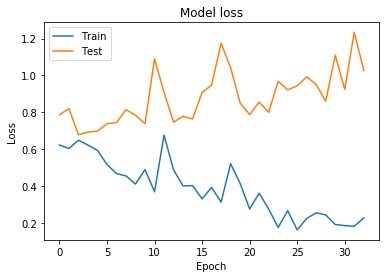

In [0]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [0]:
test_images,test_labels = get_images("/home/diseaseulcer/")
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

118/118 [==============================] - 31s 262ms/sample - loss: 0.3286 - acc: 0.8729


[0.3285573369870752, 0.87288135]

In [0]:
pred_images,no_labels = get_images("/home/diseaseulcer/")
pred_images = np.array(pred_images)
pred_images.shape

(118, 150, 150, 3)

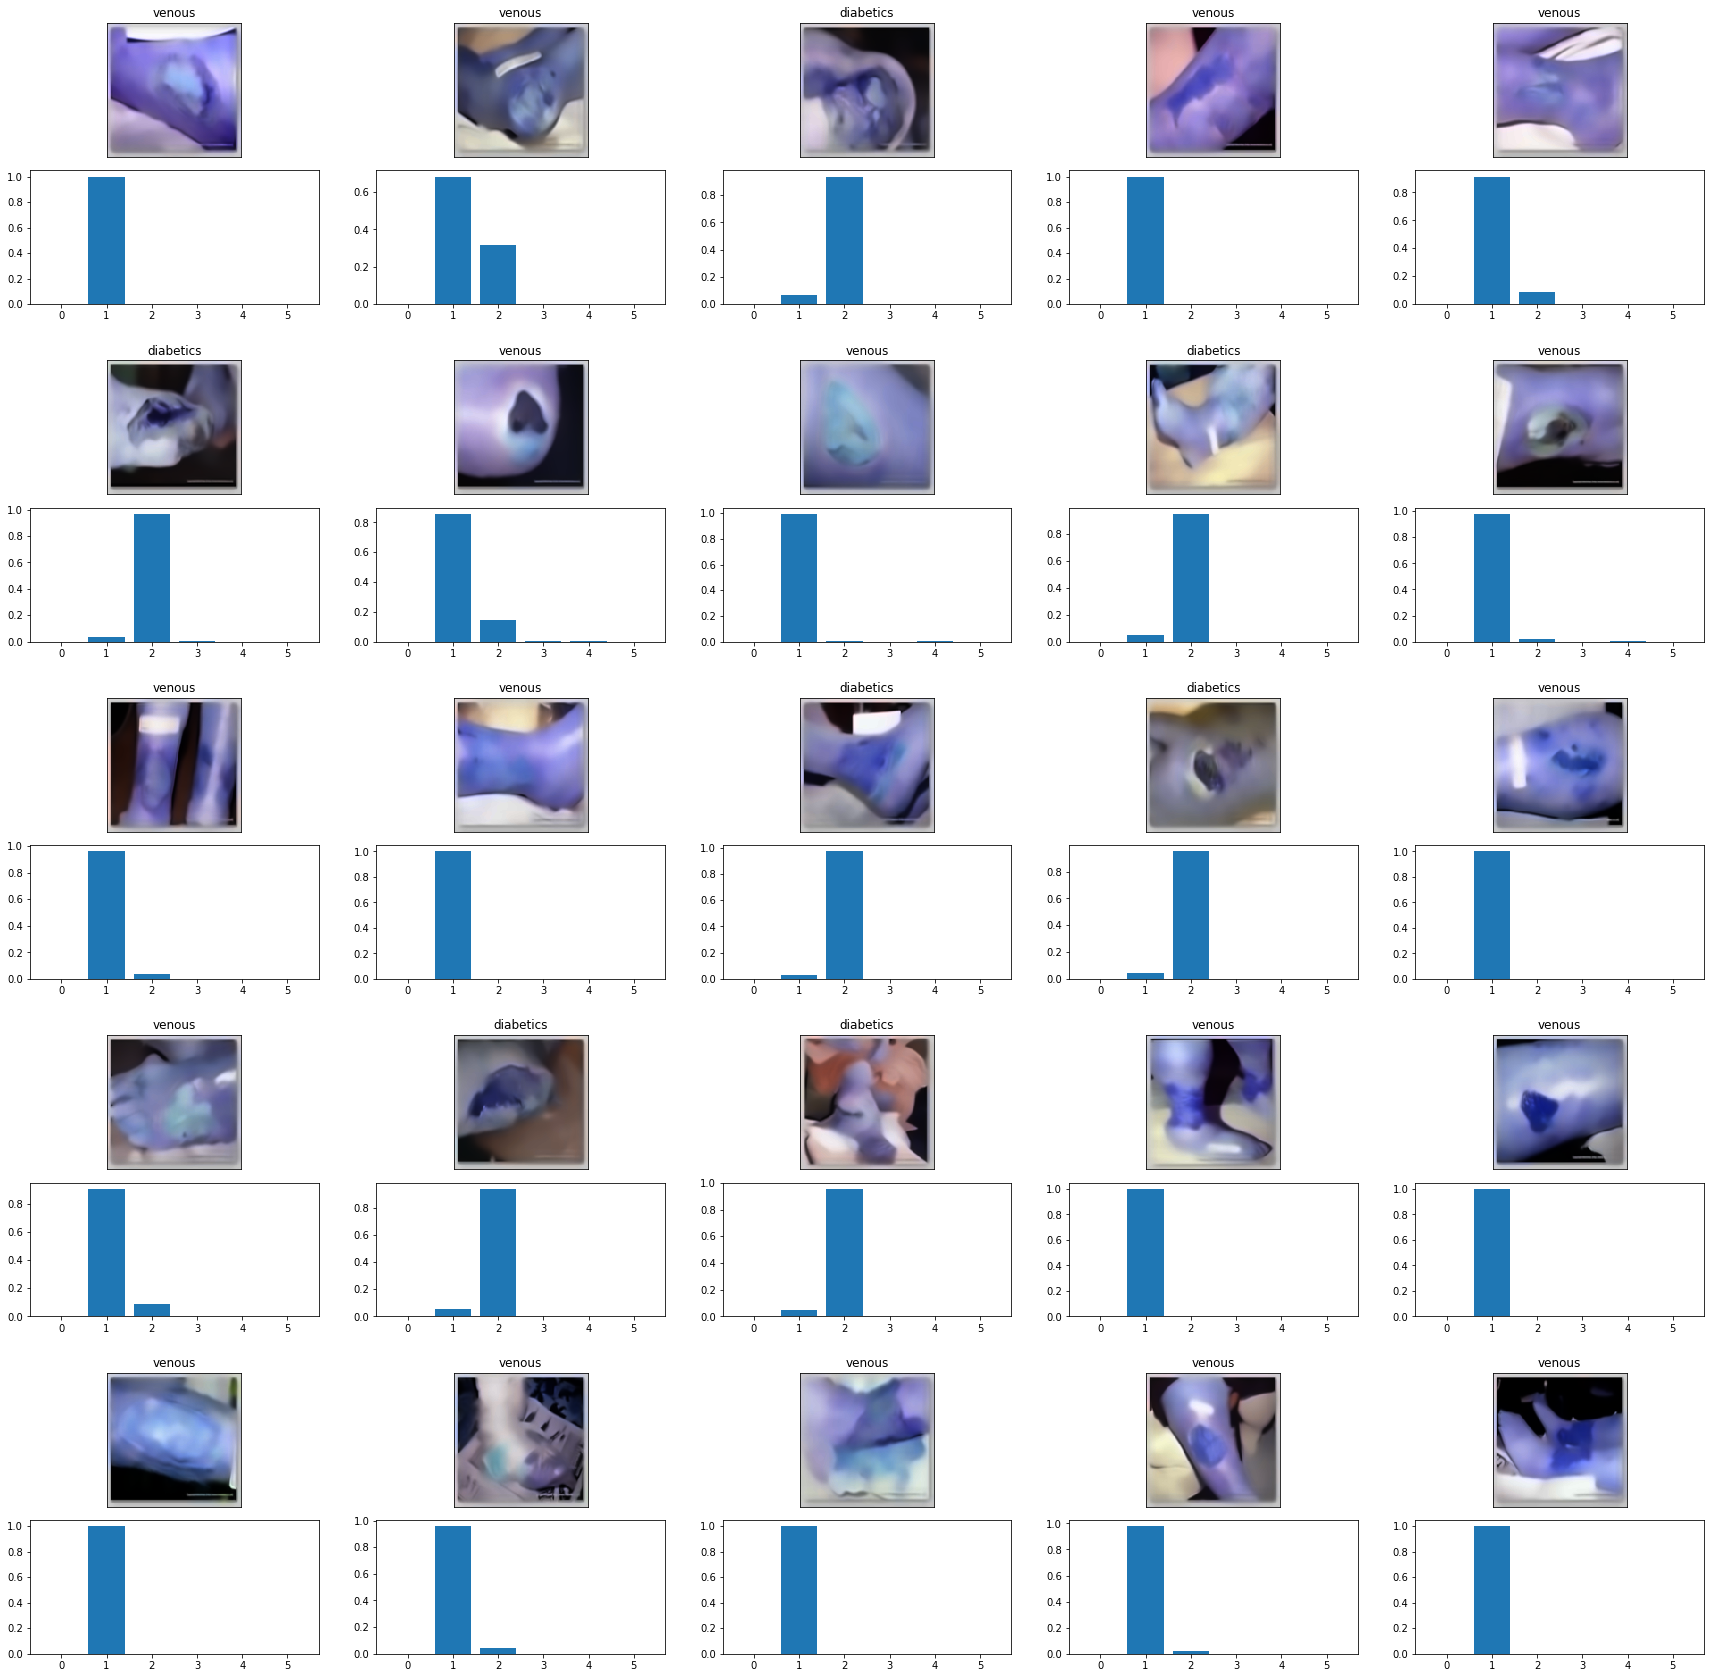

In [0]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()